# Stride Funding Technical Exercise, Data Scientist Position  
**Oscar Cardenas**

**Questions:**

Note: We are only interested in predominantly **bachelor's-degree granting institutions**


**Data Exploratory Analysis** 

In [1]:
# Importing excel file

import pandas as pd
import numpy as np
missing_value= ["n/a", "na", "--", "PrivacySuppressed", "privacysupressed"]
df = pd.read_excel('/Users/leonardo/Dropbox/Suffolk_MSBA/Stride_Funding/College_Scorecard_Variables.xlsx', na_values = missing_value)
df.head()

,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,REGION,CONTROL,ACCREDAGENCY,PREDDEG,...,PPTUG_EF,NPT4_PUB,NPT4_PRIV,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,100654,100200,Alabama A & M University,Normal,AL,35762,5,1,Southern Association of Colleges and Schools C...,3,...,0.0587,14444.0,NaN,5384.0,7101.0,0.2685,0.8987,0.429326,0.511318,31000.0
1,100663,105200,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,1,Southern Association of Colleges and Schools C...,3,...,0.2425,17005.0,NaN,16454.0,10717.0,0.5829,0.6009,0.618270,0.673330,41200.0
2,100690,2503400,Amridge University,Montgomery,AL,36117-3553,5,2,Southern Association of Colleges and Schools C...,3,...,0.5014,NaN,15322.0,4206.0,4292.0,0.4000,0.0035,0.439024,0.550725,39600.0
3,100706,105500,University of Alabama in Huntsville,Huntsville,AL,35899,5,1,Southern Association of Colleges and Schools C...,3,...,0.1443,20909.0,NaN,9242.0,9442.0,0.5187,0.6176,0.680887,0.742248,46700.0
4,100724,100500,Alabama State University,Montgomery,AL,36104-0271,5,1,Southern Association of Colleges and Schools C...,3,...,0.0666,13043.0,NaN,8527.0,7754.0,0.3001,0.8650,0.366038,0.442308,27700.0


In [2]:
df.shape

(6806, 33)

**Filtering data to get only bachelor's-degree granting institutions**

In [3]:

# Variable of interest for filtering the data frame is PREDDEG == 3, 
# which referes to Predominantly bachelor's-degree granting

df_bachelorsDGI = df[(df['PREDDEG']==3)]
df_bachelorsDGI.head()

,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,REGION,CONTROL,ACCREDAGENCY,PREDDEG,...,PPTUG_EF,NPT4_PUB,NPT4_PRIV,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,100654,100200,Alabama A & M University,Normal,AL,35762,5,1,Southern Association of Colleges and Schools C...,3,...,0.0587,14444.0,NaN,5384.0,7101.0,0.2685,0.8987,0.429326,0.511318,31000.0
1,100663,105200,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,1,Southern Association of Colleges and Schools C...,3,...,0.2425,17005.0,NaN,16454.0,10717.0,0.5829,0.6009,0.618270,0.673330,41200.0
2,100690,2503400,Amridge University,Montgomery,AL,36117-3553,5,2,Southern Association of Colleges and Schools C...,3,...,0.5014,NaN,15322.0,4206.0,4292.0,0.4000,0.0035,0.439024,0.550725,39600.0
3,100706,105500,University of Alabama in Huntsville,Huntsville,AL,35899,5,1,Southern Association of Colleges and Schools C...,3,...,0.1443,20909.0,NaN,9242.0,9442.0,0.5187,0.6176,0.680887,0.742248,46700.0
4,100724,100500,Alabama State University,Montgomery,AL,36104-0271,5,1,Southern Association of Colleges and Schools C...,3,...,0.0666,13043.0,NaN,8527.0,7754.0,0.3001,0.8650,0.366038,0.442308,27700.0


In [4]:
df_bachelorsDGI.shape

# A total of 4,758 observations were filtered out of the df

(2058, 33)

In [5]:
df_bachelorsDGI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 6322
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UNITID            2058 non-null   int64  
 1   OPEID             2058 non-null   int64  
 2   INSTNM            2058 non-null   object 
 3   CITY              2058 non-null   object 
 4   STABBR            2058 non-null   object 
 5   ZIP               2058 non-null   object 
 6   REGION            2058 non-null   int64  
 7   CONTROL           2058 non-null   int64  
 8   ACCREDAGENCY      2018 non-null   object 
 9   PREDDEG           2058 non-null   int64  
 10  HIGHDEG           2058 non-null   int64  
 11  LOCALE            2058 non-null   float64
 12  CCSIZSET          2058 non-null   float64
 13  HBCU              2058 non-null   float64
 14  ADM_RATE          1669 non-null   float64
 15  SATVRMID          1204 non-null   float64
 16  SATMTMID          1207 non-null   float64


In [6]:
# Based on the gotten results, there are several numerical columns with a significant amount of null-values
# and a categorical variable with missing values 

#Summarizing the number of null values per column

print(df_bachelorsDGI.isnull().sum())

UNITID                 0
OPEID                  0
INSTNM                 0
CITY                   0
STABBR                 0
ZIP                    0
REGION                 0
CONTROL                0
ACCREDAGENCY          40
PREDDEG                0
HIGHDEG                0
LOCALE                 0
CCSIZSET               0
HBCU                   0
ADM_RATE             389
SATVRMID             854
SATMTMID             851
SATWRMID            1342
SAT_AVG              800
ACTCMMID             822
ACTENMID             895
ACTMTMID             895
ACTWRMID            1740
PPTUG_EF               6
NPT4_PUB            1488
NPT4_PRIV            758
INEXPFTE               3
AVGFACSAL             62
C150_4               161
PFTFTUG1_EF          155
COMPL_RPY_3YR_RT     278
COMPL_RPY_5YR_RT     328
MD_EARN_WNE_P10      253
dtype: int64


In [7]:
#To determine the percentage of missing values in each column of the dataset; divide it by the len of the df,

df_bachelorsDGI.isnull().sum()/len(df_bachelorsDGI)

UNITID              0.000000
OPEID               0.000000
INSTNM              0.000000
CITY                0.000000
STABBR              0.000000
ZIP                 0.000000
REGION              0.000000
CONTROL             0.000000
ACCREDAGENCY        0.019436
PREDDEG             0.000000
HIGHDEG             0.000000
LOCALE              0.000000
CCSIZSET            0.000000
HBCU                0.000000
ADM_RATE            0.189018
SATVRMID            0.414966
SATMTMID            0.413508
SATWRMID            0.652089
SAT_AVG             0.388727
ACTCMMID            0.399417
ACTENMID            0.434888
ACTMTMID            0.434888
ACTWRMID            0.845481
PPTUG_EF            0.002915
NPT4_PUB            0.723032
NPT4_PRIV           0.368319
INEXPFTE            0.001458
AVGFACSAL           0.030126
C150_4              0.078231
PFTFTUG1_EF         0.075316
COMPL_RPY_3YR_RT    0.135083
COMPL_RPY_5YR_RT    0.159378
MD_EARN_WNE_P10     0.122935
dtype: float64

**Dropping variables with >= 40% of missing values**

In [8]:
# Based on what I was told at School, Variables with >= 40% of missing values should be drop from the data set or 
# Data frame in this case because if I impute over 40% of missing values it could bias the dataset and 
# so the results would not be that objective or significant. 
   
df_bachelorsDGI_droped = df_bachelorsDGI.drop(['SATVRMID','SATMTMID','SATWRMID','ACTENMID','ACTMTMID','ACTWRMID','NPT4_PUB'],axis=1)
df_bachelorsDGI_droped.head()

,UNITID,OPEID,INSTNM,CITY,STABBR,ZIP,REGION,CONTROL,ACCREDAGENCY,PREDDEG,...,ACTCMMID,PPTUG_EF,NPT4_PRIV,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,100654,100200,Alabama A & M University,Normal,AL,35762,5,1,Southern Association of Colleges and Schools C...,3,...,18.0,0.0587,NaN,5384.0,7101.0,0.2685,0.8987,0.429326,0.511318,31000.0
1,100663,105200,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,1,Southern Association of Colleges and Schools C...,3,...,25.0,0.2425,NaN,16454.0,10717.0,0.5829,0.6009,0.618270,0.673330,41200.0
2,100690,2503400,Amridge University,Montgomery,AL,36117-3553,5,2,Southern Association of Colleges and Schools C...,3,...,NaN,0.5014,15322.0,4206.0,4292.0,0.4000,0.0035,0.439024,0.550725,39600.0
3,100706,105500,University of Alabama in Huntsville,Huntsville,AL,35899,5,1,Southern Association of Colleges and Schools C...,3,...,28.0,0.1443,NaN,9242.0,9442.0,0.5187,0.6176,0.680887,0.742248,46700.0
4,100724,100500,Alabama State University,Montgomery,AL,36104-0271,5,1,Southern Association of Colleges and Schools C...,3,...,18.0,0.0666,NaN,8527.0,7754.0,0.3001,0.8650,0.366038,0.442308,27700.0


In [9]:
df_bachelorsDGI_droped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 6322
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UNITID            2058 non-null   int64  
 1   OPEID             2058 non-null   int64  
 2   INSTNM            2058 non-null   object 
 3   CITY              2058 non-null   object 
 4   STABBR            2058 non-null   object 
 5   ZIP               2058 non-null   object 
 6   REGION            2058 non-null   int64  
 7   CONTROL           2058 non-null   int64  
 8   ACCREDAGENCY      2018 non-null   object 
 9   PREDDEG           2058 non-null   int64  
 10  HIGHDEG           2058 non-null   int64  
 11  LOCALE            2058 non-null   float64
 12  CCSIZSET          2058 non-null   float64
 13  HBCU              2058 non-null   float64
 14  ADM_RATE          1669 non-null   float64
 15  SAT_AVG           1258 non-null   float64
 16  ACTCMMID          1236 non-null   float64


In [10]:
 pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [12]:
df_bachelorsDGI_droped['ACCREDAGENCY'].value_counts()


Higher Learning Commission                                                               622
Southern Association of Colleges and Schools Commission on Colleges                      449
Middle States Commission on Higher Education                                             378
New England Commission on Higher Education                                               157
Western Association of Schools and Colleges Senior Colleges and University Commission    130
Northwest Commission on Colleges and Universities                                         83
Association of Advanced Rabbinical and Talmudic Schools                                   61
Association for Bibical Higher Educaiton                                                  41
Transnational Association of Christian Colleges and Schools                               30
Accrediting Commission of Career Schools and Colleges                                     25
Distance Education Accrediting Commission                             

**Imputing missing values on Categorical Variable**

In [13]:
# missing values were place into the category missing 

df_bachelorsDGI_droped['ACCREDAGENCY'].fillna('missing', inplace = True)

In [14]:
df_bachelorsDGI_droped['ACCREDAGENCY'].value_counts()

Higher Learning Commission                                                               622
Southern Association of Colleges and Schools Commission on Colleges                      449
Middle States Commission on Higher Education                                             378
New England Commission on Higher Education                                               157
Western Association of Schools and Colleges Senior Colleges and University Commission    130
Northwest Commission on Colleges and Universities                                         83
Association of Advanced Rabbinical and Talmudic Schools                                   61
Association for Bibical Higher Educaiton                                                  41
missing                                                                                   40
Transnational Association of Christian Colleges and Schools                               30
Accrediting Commission of Career Schools and Colleges                 

In [15]:
df_bachelorsDGI_droped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 6322
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UNITID            2058 non-null   int64  
 1   OPEID             2058 non-null   int64  
 2   INSTNM            2058 non-null   object 
 3   CITY              2058 non-null   object 
 4   STABBR            2058 non-null   object 
 5   ZIP               2058 non-null   object 
 6   REGION            2058 non-null   int64  
 7   CONTROL           2058 non-null   int64  
 8   ACCREDAGENCY      2058 non-null   object 
 9   PREDDEG           2058 non-null   int64  
 10  HIGHDEG           2058 non-null   int64  
 11  LOCALE            2058 non-null   float64
 12  CCSIZSET          2058 non-null   float64
 13  HBCU              2058 non-null   float64
 14  ADM_RATE          1669 non-null   float64
 15  SAT_AVG           1258 non-null   float64
 16  ACTCMMID          1236 non-null   float64


In [16]:
df_bachelorsDGI_droped['ACCREDAGENCY'].value_counts()

Higher Learning Commission                                                               622
Southern Association of Colleges and Schools Commission on Colleges                      449
Middle States Commission on Higher Education                                             378
New England Commission on Higher Education                                               157
Western Association of Schools and Colleges Senior Colleges and University Commission    130
Northwest Commission on Colleges and Universities                                         83
Association of Advanced Rabbinical and Talmudic Schools                                   61
Association for Bibical Higher Educaiton                                                  41
missing                                                                                   40
Transnational Association of Christian Colleges and Schools                               30
Accrediting Commission of Career Schools and Colleges                 

In [17]:
#Splitting Numeric from Categorical variables to later on impute missing values in numeric variables, but leaving
# a unique identifier a common attribute to later merge the dataframes

Categ_Var = df_bachelorsDGI_droped[["INSTNM","CITY", "STABBR", "ZIP", "ACCREDAGENCY","UNITID"]]
Categ_Var.head()

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,UNITID
0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,100654
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,100663
2,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,100690
3,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,100706
4,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,100724


In [18]:
Categ_Var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 6322
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   INSTNM        2058 non-null   object
 1   CITY          2058 non-null   object
 2   STABBR        2058 non-null   object
 3   ZIP           2058 non-null   object
 4   ACCREDAGENCY  2058 non-null   object
 5   UNITID        2058 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 112.5+ KB


In [19]:
Categ_Var.head()

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,UNITID
0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,100654
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,100663
2,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,100690
3,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,100706
4,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,100724


In [20]:
Categ_Var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 6322
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   INSTNM        2058 non-null   object
 1   CITY          2058 non-null   object
 2   STABBR        2058 non-null   object
 3   ZIP           2058 non-null   object
 4   ACCREDAGENCY  2058 non-null   object
 5   UNITID        2058 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 112.5+ KB


In [21]:
#Splitting Numeric from Categorical variables to later on impute missing values in numeric variables

Num_Var = df_bachelorsDGI_droped[["UNITID","OPEID", "REGION", "CONTROL", "PREDDEG","HIGHDEG", "LOCALE","CCSIZSET",
                                  "HBCU","ADM_RATE","SAT_AVG","ACTCMMID","PPTUG_EF", "INEXPFTE", "AVGFACSAL", 
                                  "C150_4", "PFTFTUG1_EF", "COMPL_RPY_3YR_RT","COMPL_RPY_5YR_RT",
                                 "MD_EARN_WNE_P10"]]
Num_Var.head()

,UNITID,OPEID,REGION,CONTROL,PREDDEG,HIGHDEG,LOCALE,CCSIZSET,HBCU,ADM_RATE,SAT_AVG,ACTCMMID,PPTUG_EF,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,100654,100200,5,1,3,4,12.0,14.0,1.0,0.8986,957.0,18.0,0.0587,5384.0,7101.0,0.2685,0.8987,0.429326,0.511318,31000.0
1,100663,105200,5,1,3,4,12.0,15.0,0.0,0.9211,1220.0,25.0,0.2425,16454.0,10717.0,0.5829,0.6009,0.618270,0.673330,41200.0
2,100690,2503400,5,2,3,4,12.0,6.0,0.0,NaN,NaN,NaN,0.5014,4206.0,4292.0,0.4000,0.0035,0.439024,0.550725,39600.0
3,100706,105500,5,1,3,4,12.0,12.0,0.0,0.8087,1314.0,28.0,0.1443,9242.0,9442.0,0.5187,0.6176,0.680887,0.742248,46700.0
4,100724,100500,5,1,3,4,12.0,14.0,1.0,0.9774,972.0,18.0,0.0666,8527.0,7754.0,0.3001,0.8650,0.366038,0.442308,27700.0


In [22]:
numeric_columns= columns_to_use = ["UNITID","OPEID", "REGION", "CONTROL", "PREDDEG","HIGHDEG", "LOCALE","CCSIZSET",
                                  "HBCU","ADM_RATE","SAT_AVG","ACTCMMID","PPTUG_EF", "INEXPFTE", "AVGFACSAL", 
                                  "C150_4", "PFTFTUG1_EF", "COMPL_RPY_3YR_RT","COMPL_RPY_5YR_RT",
                                 "MD_EARN_WNE_P10"]

In [23]:
# There is a particular situation with SAT_AVG because it has 38.87% of missing values, which is very close to the
# educational threshold, due to this I am going to proceed to impute missing values with the IterativeImputer 
# from sklearn.

import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputed = IterativeImputer()
Num_Var_imputed = imputed.fit_transform(Num_Var)


In [24]:
final_imputed = pd.DataFrame(Num_Var_imputed,columns=numeric_columns) 
final_imputed.head()

,UNITID,OPEID,REGION,CONTROL,PREDDEG,HIGHDEG,LOCALE,CCSIZSET,HBCU,ADM_RATE,SAT_AVG,ACTCMMID,PPTUG_EF,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,100654.0,100200.0,5.0,1.0,3.0,4.0,12.0,14.0,1.0,0.898600,957.000000,18.000000,0.0587,5384.0,7101.0,0.2685,0.8987,0.429326,0.511318,31000.0
1,100663.0,105200.0,5.0,1.0,3.0,4.0,12.0,15.0,0.0,0.921100,1220.000000,25.000000,0.2425,16454.0,10717.0,0.5829,0.6009,0.618270,0.673330,41200.0
2,100690.0,2503400.0,5.0,2.0,3.0,4.0,12.0,6.0,0.0,0.655184,1121.869752,22.737049,0.5014,4206.0,4292.0,0.4000,0.0035,0.439024,0.550725,39600.0
3,100706.0,105500.0,5.0,1.0,3.0,4.0,12.0,12.0,0.0,0.808700,1314.000000,28.000000,0.1443,9242.0,9442.0,0.5187,0.6176,0.680887,0.742248,46700.0
4,100724.0,100500.0,5.0,1.0,3.0,4.0,12.0,14.0,1.0,0.977400,972.000000,18.000000,0.0666,8527.0,7754.0,0.3001,0.8650,0.366038,0.442308,27700.0


In [25]:
final_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UNITID            2058 non-null   float64
 1   OPEID             2058 non-null   float64
 2   REGION            2058 non-null   float64
 3   CONTROL           2058 non-null   float64
 4   PREDDEG           2058 non-null   float64
 5   HIGHDEG           2058 non-null   float64
 6   LOCALE            2058 non-null   float64
 7   CCSIZSET          2058 non-null   float64
 8   HBCU              2058 non-null   float64
 9   ADM_RATE          2058 non-null   float64
 10  SAT_AVG           2058 non-null   float64
 11  ACTCMMID          2058 non-null   float64
 12  PPTUG_EF          2058 non-null   float64
 13  INEXPFTE          2058 non-null   float64
 14  AVGFACSAL         2058 non-null   float64
 15  C150_4            2058 non-null   float64
 16  PFTFTUG1_EF       2058 non-null   float64


In [26]:
# Appending  the data frames that contains "Categ_Var" and the numeric variables with imputed missing values 
# "final_imputed"

df_cleaned_final = pd.merge(Categ_Var, final_imputed, on = 'UNITID', how = 'inner')
df_cleaned_final

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,UNITID,OPEID,REGION,CONTROL,PREDDEG,...,SAT_AVG,ACTCMMID,PPTUG_EF,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,100654,100200.0,5.0,1.0,3.0,...,957.000000,18.000000,0.0587,5384.0,7101.0,0.268500,0.898700,0.429326,0.511318,31000.000000
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,100663,105200.0,5.0,1.0,3.0,...,1220.000000,25.000000,0.2425,16454.0,10717.0,0.582900,0.600900,0.618270,0.673330,41200.000000
2,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,100690,2503400.0,5.0,2.0,3.0,...,1121.869752,22.737049,0.5014,4206.0,4292.0,0.400000,0.003500,0.439024,0.550725,39600.000000
3,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,100706,105500.0,5.0,1.0,3.0,...,1314.000000,28.000000,0.1443,9242.0,9442.0,0.518700,0.617600,0.680887,0.742248,46700.000000
4,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,100724,100500.0,5.0,1.0,3.0,...,972.000000,18.000000,0.0666,8527.0,7754.0,0.300100,0.865000,0.366038,0.442308,27700.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Champion Christian College,Hot Springs,AR,71913,Transnational Association of Christian College...,492069,4276100.0,5.0,2.0,3.0,...,1119.007314,22.545030,0.0690,6188.0,2667.0,0.177800,0.652200,0.691802,0.730861,33562.942273
2054,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,492689,1067401.0,6.0,1.0,3.0,...,1214.319927,26.080325,0.2348,153080.0,18393.0,0.484999,0.470799,0.816043,0.844344,112279.484510
2055,Chamberlain University-Louisiana,Jefferson,LA,70121,Higher Learning Commission,492759,638521.0,5.0,3.0,3.0,...,1127.827915,23.145274,0.2667,23749.0,6620.0,0.363148,0.581177,0.711494,0.757137,46848.458609
2056,Drury University-College of Continuing Profess...,Springfield,MO,65802,Higher Learning Commission,492801,246100.0,4.0,2.0,3.0,...,1115.700190,22.643124,0.4292,4515.0,5794.0,0.189000,0.256100,0.681274,0.727879,39588.573796


In [27]:
df_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTNM            2058 non-null   object 
 1   CITY              2058 non-null   object 
 2   STABBR            2058 non-null   object 
 3   ZIP               2058 non-null   object 
 4   ACCREDAGENCY      2058 non-null   object 
 5   UNITID            2058 non-null   int64  
 6   OPEID             2058 non-null   float64
 7   REGION            2058 non-null   float64
 8   CONTROL           2058 non-null   float64
 9   PREDDEG           2058 non-null   float64
 10  HIGHDEG           2058 non-null   float64
 11  LOCALE            2058 non-null   float64
 12  CCSIZSET          2058 non-null   float64
 13  HBCU              2058 non-null   float64
 14  ADM_RATE          2058 non-null   float64
 15  SAT_AVG           2058 non-null   float64
 16  ACTCMMID          2058 non-null   float64


**1. What is the mean, median and standard deviation of the average SAT for each region?**

In [28]:
df_cleaned_final['REGION'].value_counts()


5.0    482
2.0    399
3.0    295
8.0    230
4.0    210
1.0    164
6.0    161
7.0     61
9.0     51
0.0      5
Name: REGION, dtype: int64

In [29]:
# grouping data based on region 

region_group= df_cleaned_final.groupby(['REGION'])


In [30]:
region_group['SAT_AVG'].agg(['mean', 'median', 'std'])

,mean,median,std
REGION,,,
0.0,1321.200000,1312.000000,28.420063
1.0,1169.316585,1134.340262,122.205915
2.0,1145.774758,1127.933747,106.658346
3.0,1136.027813,1126.218562,93.606911
4.0,1140.628168,1132.286510,73.937630
5.0,1125.291896,1125.987782,97.335601
6.0,1122.211527,1127.165463,91.656149
7.0,1149.207647,1141.813142,66.537702
8.0,1159.045641,1143.000000,97.632128


**2. What are the ten most selective schools and the ten least selective schools based on admission rates?**

In [31]:
df_cleaned_final['ADM_RATE'].value_counts()

1.000000    34
0.500000     7
0.750000     6
0.800000     5
0.909100     4
            ..
0.861800     1
0.614772     1
0.895800     1
0.753635     1
0.421600     1
Name: ADM_RATE, Length: 1817, dtype: int64

In [32]:
df_copy= df_cleaned_final.copy(deep=True)

In [33]:
df_copy['rankby_admin_rate'] = df_copy['ADM_RATE'].rank(ascending=False)


In [34]:
df_copy.head()

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,UNITID,OPEID,REGION,CONTROL,PREDDEG,...,ACTCMMID,PPTUG_EF,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10,rankby_admin_rate
0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,100654,100200.0,5.0,1.0,3.0,...,18.000000,0.0587,5384.0,7101.0,0.2685,0.8987,0.429326,0.511318,31000.0,256.0
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,100663,105200.0,5.0,1.0,3.0,...,25.000000,0.2425,16454.0,10717.0,0.5829,0.6009,0.618270,0.673330,41200.0,194.0
2,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,100690,2503400.0,5.0,2.0,3.0,...,22.737049,0.5014,4206.0,4292.0,0.4000,0.0035,0.439024,0.550725,39600.0,1203.0
3,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,100706,105500.0,5.0,1.0,3.0,...,28.000000,0.1443,9242.0,9442.0,0.5187,0.6176,0.680887,0.742248,46700.0,502.0
4,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,100724,100500.0,5.0,1.0,3.0,...,18.000000,0.0666,8527.0,7754.0,0.3001,0.8650,0.366038,0.442308,27700.0,78.0


In [35]:
# These are the schools with the 10 ten most selective schools based on admission rates

df_copy.sort_values('ADM_RATE',ascending=False).head(10)

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,UNITID,OPEID,REGION,CONTROL,PREDDEG,...,ACTCMMID,PPTUG_EF,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10,rankby_admin_rate
1991,University of Phoenix-Georgia,Atlanta,GA,30328,Higher Learning Commission,484677,82098876.0,5.0,3.0,3.0,...,22.147260,0.0,3311.0,-9352.199346,0.1269,-0.229447,0.420775,0.543255,47100.0,1.0
1994,University of Phoenix-Nevada,Las Vegas,NV,89135,Higher Learning Commission,484710,82098816.0,8.0,3.0,3.0,...,22.291767,0.0,3007.0,-9036.715132,0.1963,0.083300,0.420775,0.543255,47100.0,2.0
1786,University of Phoenix-Washington,Tukwila,WA,98188-8553,Higher Learning Commission,432223,52098845.0,8.0,3.0,3.0,...,22.414503,0.0,2743.0,-4061.855643,0.1667,0.066192,0.420775,0.543255,47100.0,3.0
1769,University of Phoenix-New Mexico,Albuquerque,NM,87113-1570,Higher Learning Commission,405997,52098843.0,6.0,3.0,3.0,...,22.532898,0.0,6719.0,-3546.232155,0.2642,0.076952,0.420775,0.543255,47100.0,4.0
1997,University of Phoenix-Texas,Houston,TX,77079,Higher Learning Commission,484756,42098871.0,6.0,3.0,3.0,...,22.501692,0.0,2367.0,-1179.381278,0.1410,0.038500,0.420775,0.543255,47100.0,5.0
1999,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,Higher Learning Commission,484783,42098854.0,2.0,3.0,3.0,...,22.395918,0.0,6204.0,-1974.044112,0.1358,0.166639,0.420775,0.543255,47100.0,6.0
1996,University of Phoenix-Tennessee,Cordova,TN,38018,missing,484747,42098867.0,5.0,3.0,3.0,...,22.413200,0.0,4245.0,-2088.239417,0.1336,0.150719,0.420775,0.543255,47100.0,7.0
1995,University of Phoenix-North Carolina,Charlotte,NC,28273,Higher Learning Commission,484729,42098827.0,5.0,3.0,3.0,...,22.430451,0.0,4161.0,-2052.003951,0.1529,0.153521,0.420775,0.543255,47100.0,8.0
1998,University of Phoenix-Virginia,Virginia Beach,VA,23462,missing,484765,42098889.0,5.0,3.0,3.0,...,22.499224,0.0,7239.0,-2029.502130,0.1746,0.175044,0.420775,0.543255,47100.0,9.0
1755,University of Phoenix-Utah,Salt Lake City,UT,84123-4642,Higher Learning Commission,380465,42098884.0,7.0,3.0,3.0,...,22.497519,0.0,2972.0,-2181.171586,0.2000,0.175249,0.420775,0.543255,47100.0,10.0


In [36]:
# These are the 10 most selective schools based on admission rates

df_copy.sort_values('ADM_RATE',ascending=True).head(10)

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,UNITID,OPEID,REGION,CONTROL,PREDDEG,...,ACTCMMID,PPTUG_EF,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10,rankby_admin_rate
2054,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,492689,1067401.0,6.0,1.0,3.0,...,26.080325,0.2348,153080.0,18393.0,0.484999,0.470799,0.816043,0.844344,112279.484510,2058.0
1536,The University of Texas Health Science Center ...,Houston,TX,77030,Southern Association of Colleges and Schools C...,229300,495100.0,6.0,1.0,3.0,...,26.062861,0.1883,161644.0,10430.0,0.540398,0.688254,0.875536,0.881295,90300.000000,2057.0
2029,Chamberlain University-California,Rancho Cordova,CA,95670,Higher Learning Commission,489353,638520.0,8.0,3.0,3.0,...,23.204970,0.4027,9333.0,9172.0,0.374393,0.411916,0.664636,0.737939,50717.340384,2055.5
389,Saint Anthony College of Nursing,Rockford,IL,61114,Higher Learning Commission,149028,998700.0,3.0,2.0,3.0,...,24.033588,0.2353,10658.0,7137.0,0.638593,0.582222,0.905512,0.915753,60600.000000,2055.5
1724,Stanford University,Stanford,CA,94305,Western Association of Schools and Colleges Se...,243744,130500.0,8.0,2.0,3.0,...,34.000000,0.0000,108509.0,20279.0,0.943800,0.986000,0.915870,0.919866,94000.000000,2054.0
1262,Curtis Institute of Music,Philadelphia,PA,19103,Middle States Commission on Higher Education,211893,325100.0,2.0,2.0,3.0,...,24.348175,0.0000,50390.0,8681.0,0.642900,0.812500,0.728293,0.771153,56076.856613,2053.0
631,Harvard University,Cambridge,MA,2138,New England Commission on Higher Education,166027,215500.0,1.0,2.0,3.0,...,34.000000,0.0794,45799.0,20484.0,0.977100,0.992200,0.826087,0.784946,89700.000000,2052.0
886,Princeton University,Princeton,NJ,08544-0070,Middle States Commission on Higher Education,186131,262700.0,2.0,2.0,3.0,...,34.000000,0.0000,58337.0,20185.0,0.963800,0.993300,0.768114,0.817079,74700.000000,2051.0
925,Columbia University in the City of New York,New York,NY,10027,Middle States Commission on Higher Education,190150,270700.0,2.0,2.0,3.0,...,34.000000,0.0669,92003.0,18763.0,0.958200,0.688400,0.838610,0.882396,83300.000000,2050.0
210,Yale University,New Haven,CT,6520,New England Commission on Higher Education,130794,142600.0,1.0,2.0,3.0,...,34.000000,0.0042,65270.0,19093.0,0.966000,0.989900,0.910663,0.906375,83200.000000,2049.0


**3. Which of the variables in the dataset are most highly correlated with median income 10 years after graduating?**

In [37]:
df_cleaned_final.head()

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,UNITID,OPEID,REGION,CONTROL,PREDDEG,...,SAT_AVG,ACTCMMID,PPTUG_EF,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,100654,100200.0,5.0,1.0,3.0,...,957.000000,18.000000,0.0587,5384.0,7101.0,0.2685,0.8987,0.429326,0.511318,31000.0
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,100663,105200.0,5.0,1.0,3.0,...,1220.000000,25.000000,0.2425,16454.0,10717.0,0.5829,0.6009,0.618270,0.673330,41200.0
2,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,100690,2503400.0,5.0,2.0,3.0,...,1121.869752,22.737049,0.5014,4206.0,4292.0,0.4000,0.0035,0.439024,0.550725,39600.0
3,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,100706,105500.0,5.0,1.0,3.0,...,1314.000000,28.000000,0.1443,9242.0,9442.0,0.5187,0.6176,0.680887,0.742248,46700.0
4,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,100724,100500.0,5.0,1.0,3.0,...,972.000000,18.000000,0.0666,8527.0,7754.0,0.3001,0.8650,0.366038,0.442308,27700.0


In [38]:
df_cleaned_final_correlation=df_cleaned_final.corr()
df_cleaned_final_correlation

,UNITID,OPEID,REGION,CONTROL,PREDDEG,HIGHDEG,LOCALE,CCSIZSET,HBCU,ADM_RATE,SAT_AVG,ACTCMMID,PPTUG_EF,INEXPFTE,AVGFACSAL,C150_4,PFTFTUG1_EF,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,MD_EARN_WNE_P10
UNITID,1.000000,0.335665,0.110249,0.321522,NaN,-0.171454,-0.086629,-0.427252,-0.084174,0.148445,-0.053591,-0.072484,0.283482,-0.128729,-0.294112,-0.321726,-0.364271,-0.180373,-0.169563,-0.052054
OPEID,0.335665,1.000000,0.087944,0.240882,NaN,-0.031844,-0.058103,-0.195337,-0.038333,0.264655,-0.046003,-0.047344,-0.023790,-0.081469,-0.398109,-0.206649,-0.237202,-0.208095,-0.184370,-0.016260
REGION,0.110249,0.087944,1.000000,0.035560,NaN,0.036418,-0.081501,-0.063471,0.043326,0.022976,-0.035607,-0.100441,0.120322,-0.080397,-0.133657,-0.186445,-0.184456,-0.177753,-0.225984,-0.161128
CONTROL,0.321522,0.240882,0.035560,1.000000,NaN,-0.175975,-0.118062,-0.470277,-0.094633,-0.021243,0.012547,0.009173,0.117135,-0.101330,-0.330645,-0.129271,-0.222495,-0.214953,-0.169136,-0.059968
PREDDEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HIGHDEG,-0.171454,-0.031844,0.036418,-0.175975,NaN,1.000000,-0.114142,0.363673,-0.055656,0.103441,0.037391,0.031367,0.085967,0.006735,0.211574,0.099801,-0.085602,0.032035,0.036149,0.134864
LOCALE,-0.086629,-0.058103,-0.081501,-0.118062,NaN,-0.114142,1.000000,-0.051688,-0.017698,0.037892,-0.143277,-0.137630,-0.088261,-0.096279,-0.140562,-0.034293,0.144185,0.080627,0.104142,-0.168071
CCSIZSET,-0.427252,-0.195337,-0.063471,-0.470277,NaN,0.363673,-0.051688,1.000000,0.023487,-0.077929,0.298151,0.306242,-0.261269,0.171169,0.561270,0.421391,0.353314,0.301452,0.286673,0.305076
HBCU,-0.084174,-0.038333,0.043326,-0.094633,NaN,-0.055656,-0.017698,0.023487,1.000000,-0.071746,-0.229387,-0.228723,-0.074231,-0.054690,-0.075397,-0.174778,0.090368,-0.390173,-0.421200,-0.201016
ADM_RATE,0.148445,0.264655,0.022976,-0.021243,NaN,0.103441,0.037892,-0.077929,-0.071746,1.000000,-0.383396,-0.382843,0.048418,-0.413454,-0.378160,-0.301664,-0.159792,-0.117840,-0.065792,-0.278341


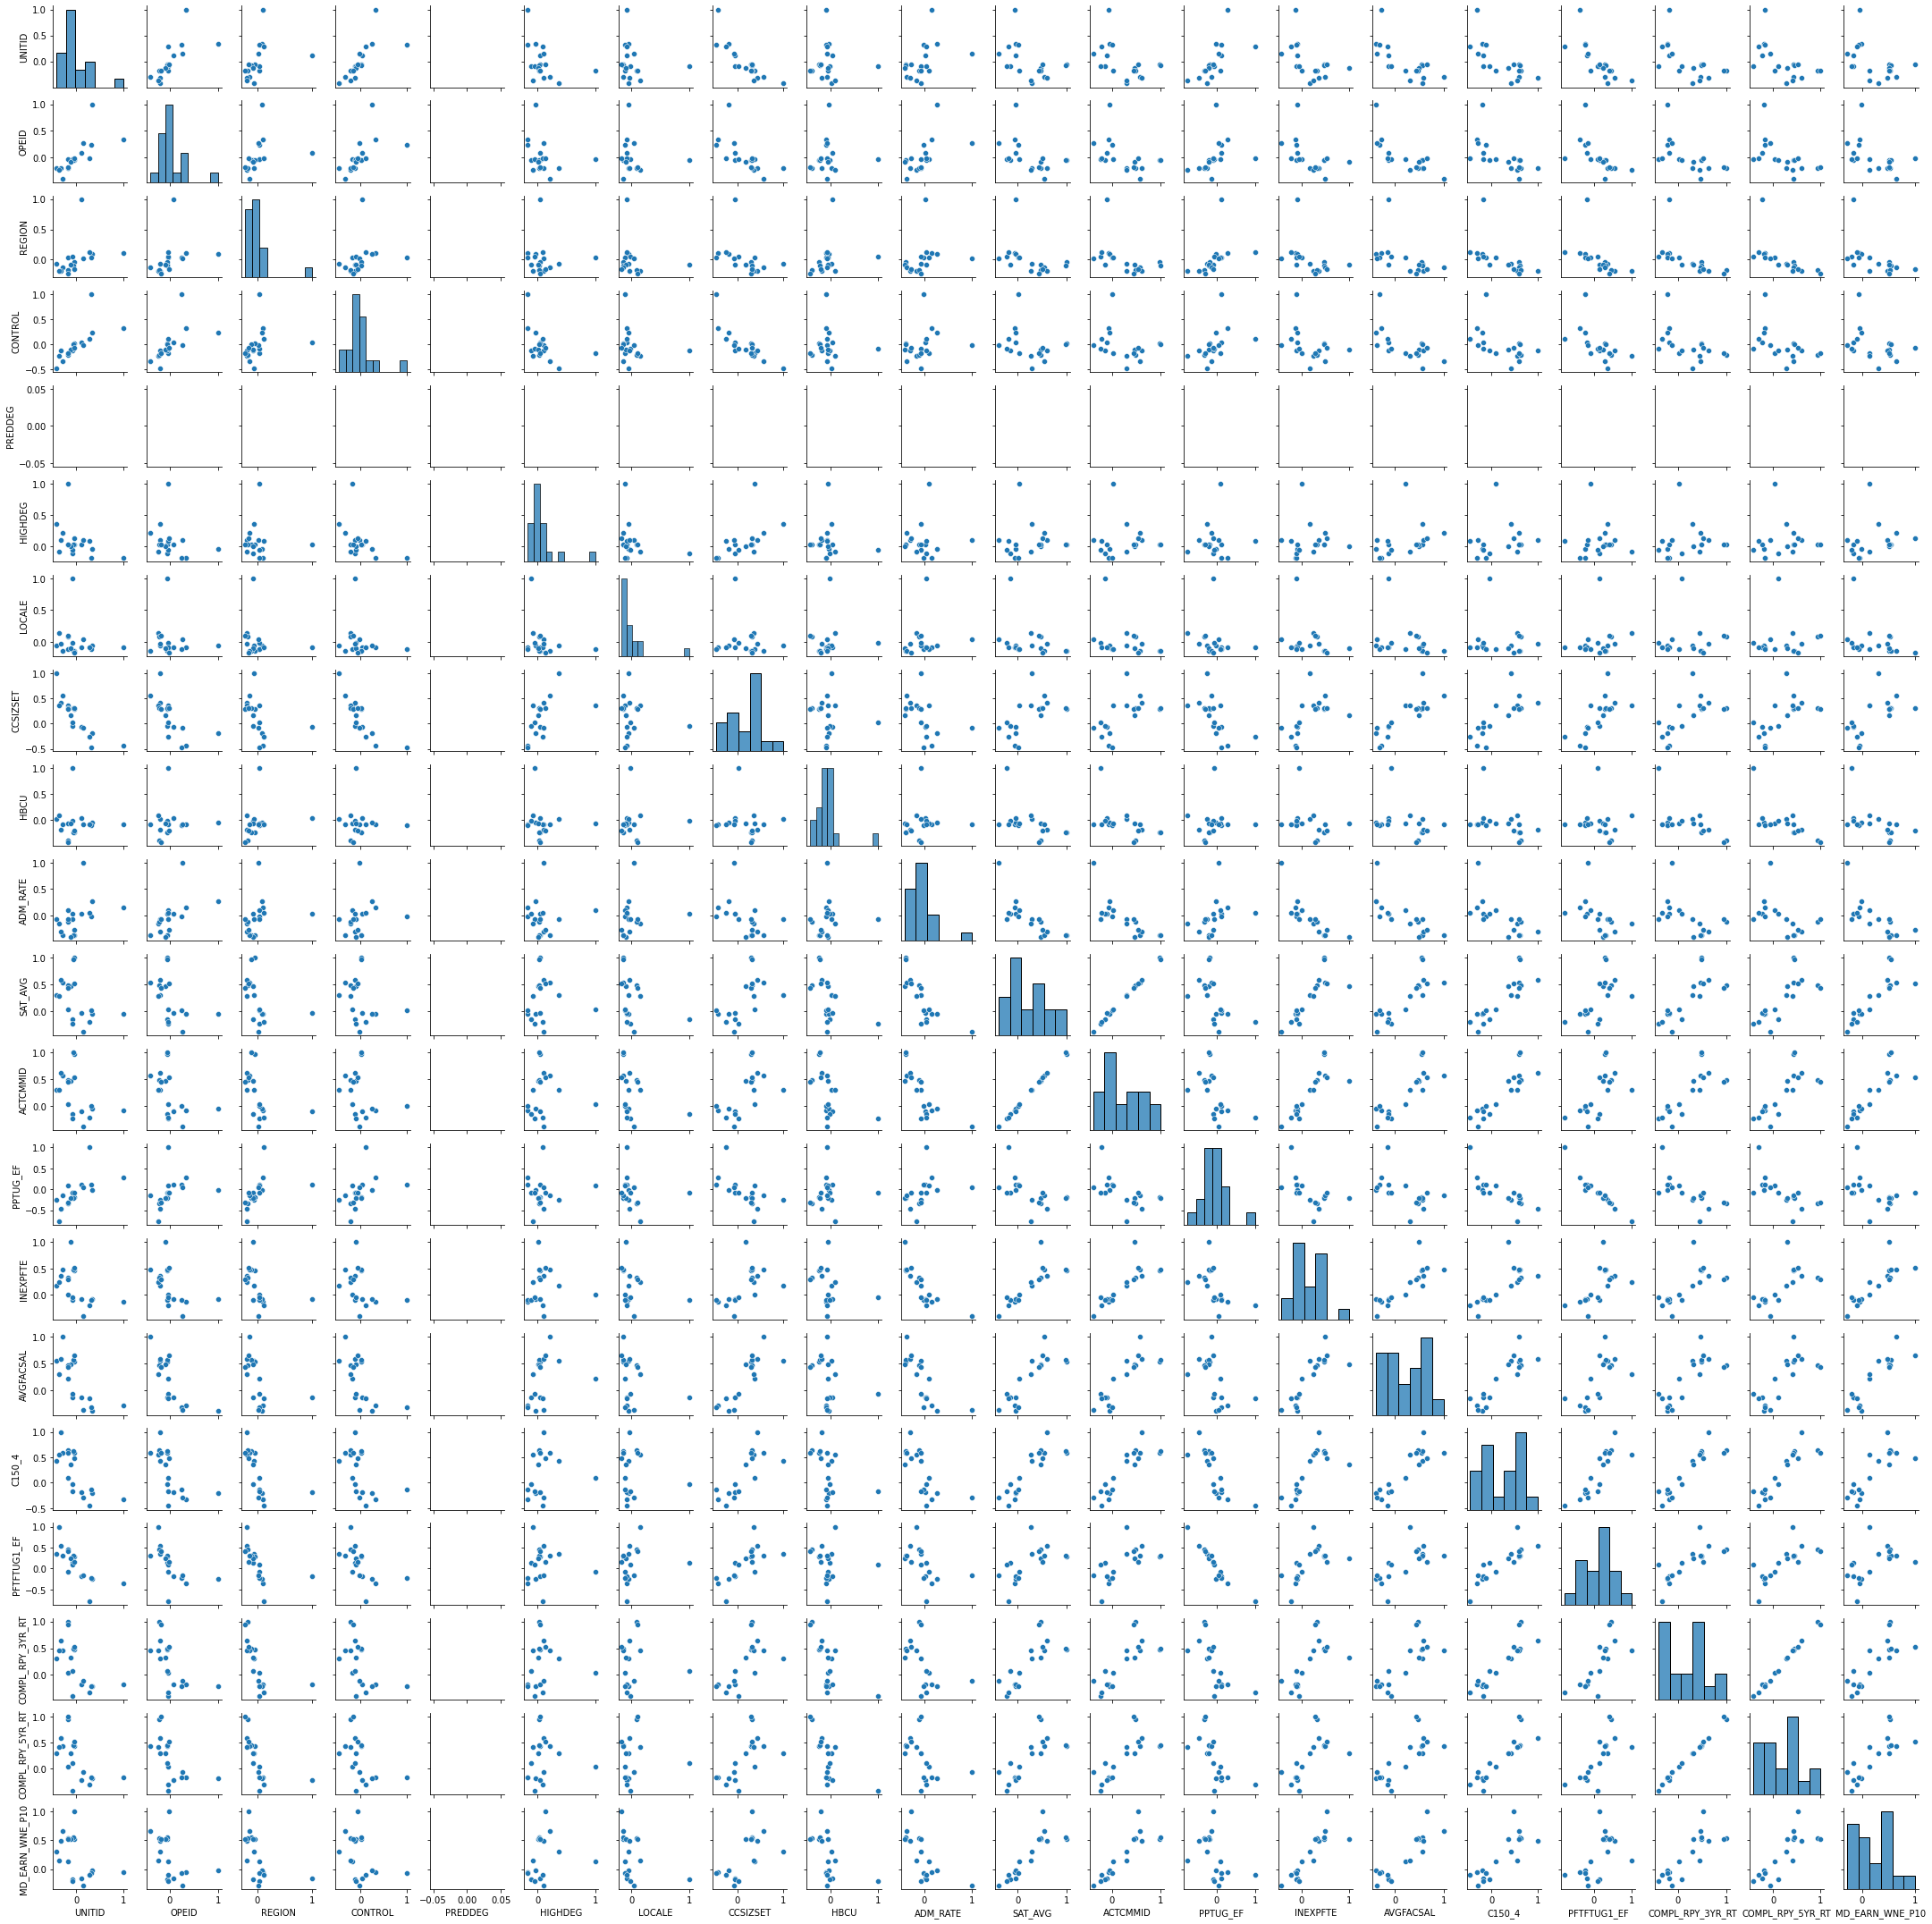

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.pairplot(df_cleaned_final_correlation, height=1.5)
plt.tight_layout()

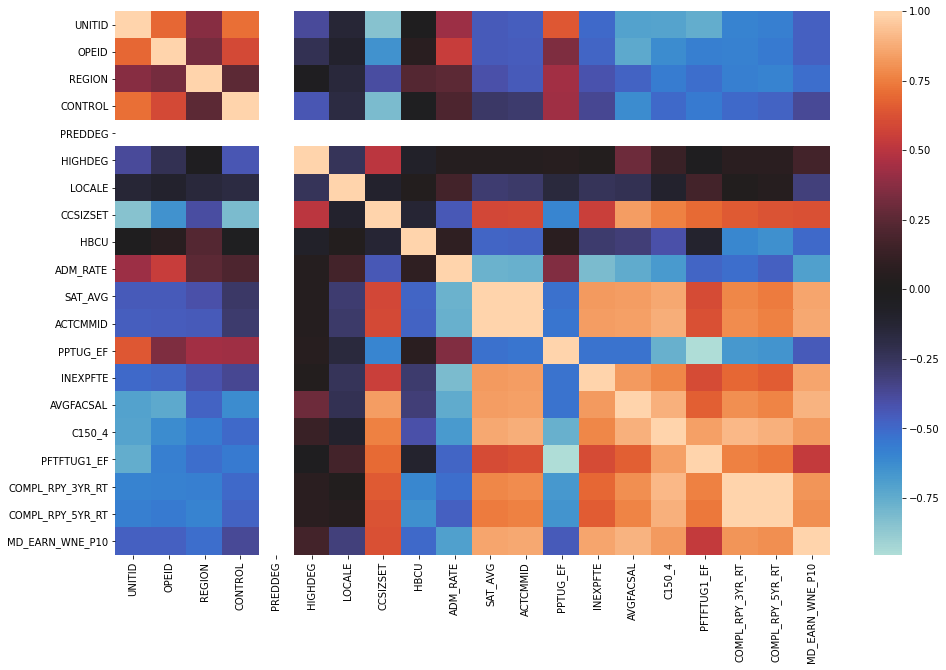

In [40]:
plt.figure(figsize=(16,10))
sns.heatmap(df_cleaned_final_correlation.corr(),center=0)
plt.show()

In [41]:
# Keep in mind the range used at Stride funding to consider variables highly corrilated.

# The variable that correlates the most to median income 10 years after graduating would be AVGFACSAL
#(Average faculty salary) with 0.65. 



**4. Describe, if any, the relationship between a school’s five year repayment rate versus a school’s completion rate for first time full time students?**

In [42]:
df_cleaned_final['COMPL_RPY_5YR_RT'].value_counts()

0.869773    20
0.543255    19
0.665704    17
0.520375    17
0.737939    14
            ..
0.839997     1
0.837696     1
0.831703     1
0.759295     1
0.858513     1
Name: COMPL_RPY_5YR_RT, Length: 1790, dtype: int64

In [43]:
df_cleaned_final['C150_4'].value_counts()

0.000000    33
0.500000    25
0.333300    13
0.375000    11
1.000000    11
            ..
0.517100     1
0.814200     1
0.212800     1
0.384594     1
0.469400     1
Name: C150_4, Length: 1690, dtype: int64

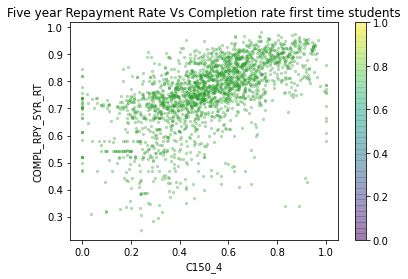

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


x = df_cleaned_final['C150_4']
y = df_cleaned_final['COMPL_RPY_5YR_RT']
colors = 'tab:green'
sizes = 5

plt.title("Five year Repayment Rate Vs Completion rate first time students") #title
plt.xlabel("C150_4") #x label
plt.ylabel("COMPL_RPY_5YR_RT") #y label

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

In [45]:
# Based on the plot, there is in general a positive relationship between these two variables,
# despite the significant dispertion, which means that first-time students at a 4 year program tend 
# to complete 5 year repayment plans. The higher the higher the completion rate the higher the repayment plan rate 

**5. Visualize the distribution of the average SAT per institution and each institution’s admission rates. How would you describe each distribution? How do they compare to one another (Note, we aren’t necessarily looking for specific statistical tests here).**

In [46]:
df_cleaned_final['ADM_RATE'].value_counts()

1.000000    34
0.500000     7
0.750000     6
0.800000     5
0.909100     4
            ..
0.861800     1
0.614772     1
0.895800     1
0.753635     1
0.421600     1
Name: ADM_RATE, Length: 1817, dtype: int64

Text(0, 0.5, 'Frequency')

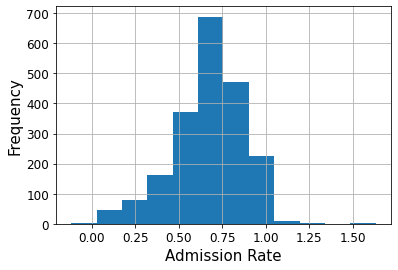

In [47]:
#Distrubition of Admission Rate

df_cleaned_final['ADM_RATE'].hist(bins=12, grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel("Admission Rate", fontsize=15)
plt.ylabel("Frequency",fontsize=15)


In [48]:
# The distribution of ADM_RATE tends to be normal; the bin between 0.5 and 0.75 presents the highest frequency  

In [49]:
df_cleaned_final['SAT_AVG'].value_counts()

1120.000000    19
1105.000000    13
1133.000000    12
1050.000000    11
1084.000000    11
               ..
1139.859758     1
1142.609425     1
1124.892383     1
1118.716480     1
1118.123328     1
Name: SAT_AVG, Length: 1241, dtype: int64

Text(0.5, 0, 'SAT Average')

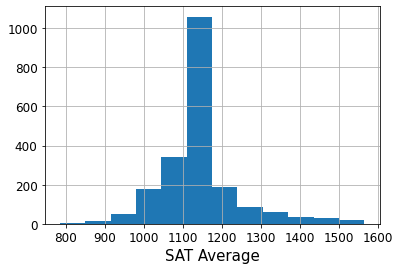

In [50]:
#Distrubition of SAT Average

df_cleaned_final['SAT_AVG'].hist(bins=12, grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel("SAT Average", fontsize=15)


In [51]:
# The distribution of ADM_RATE tends to be normal; the bin between 1100 and 1200 presents the highest frequency  

In [52]:
df_cleaned_final['INSTNM'].value_counts()

Union College                        3
Stevens-Henager College              3
Lincoln University                   3
Westminster College                  3
Bethel University                    3
                                    ..
University of Maine at Augusta       1
Howard University                    1
University of Wisconsin-Green Bay    1
Oikos University                     1
Bluefield State College              1
Name: INSTNM, Length: 2037, dtype: int64

Text(0, 0.5, 'Frequency')

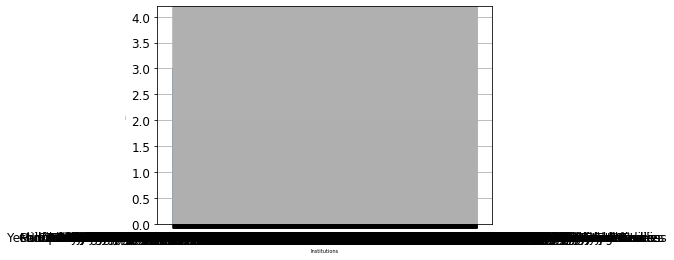

In [53]:
df_cleaned_final['INSTNM'].hist(bins=1000, grid=True, xlabelsize=12, ylabelsize=12)
plt.xlabel("Institutions", fontsize=5)
plt.ylabel("Frequency",fontsize=0.5)

In [54]:
#Is there any other criteria that could be used to filter the data because there is 2037 unique values 

In [55]:
# Honestly, I tried to approach this question in different ways, 
# but I was not able to present the distribution in another way, tho. 

# I would appreacite your feedback to learn more about it,


# Best,
